In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC, LinearSVC

vectorizer = SentenceTransformer('intfloat/multilingual-e5-large-instruct', cache_folder="N:\AI\Transformers_cache")
#vectorizer = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
#model = MLPClassifier(random_state=42, alpha=0.25)
model = LinearSVC(C=0.5, random_state=42)

data = pd.read_csv('Annotated_data.csv')
distortion_data = data[data['Dominant Distortion'] != 'No Distortion']
distortion_data = distortion_data.reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(distortion_data['Patient Question'], distortion_data['Dominant Distortion'], test_size=0.2, random_state=42)

# Preprocess the text data and vectorize using the provided vectorizer
X_train_vectorized = vectorizer.encode(X_train.tolist())
X_test_vectorized = vectorizer.encode(X_test.tolist())

# Train the model on the training data
#model.fit(X_train_vectorized, y_train)

# Predict the labels for the testing data
#y_pred = model.predict(X_test_vectorized)

# Calculate the F1-score
#f1 = f1_score(y_test, y_pred, average='weighted')

# Output the F1-score
#print(f"F1-score: {f1}")

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# print the confusion matrix with labels
#print(confusion_matrix(y_test, y_pred, labels=distortion_data['Dominant Distortion'].unique()))

# Plot the confusion matrix as a heatmap
labels = distortion_data['Dominant Distortion'].unique()
#cm = confusion_matrix(y_test, y_pred, labels=labels)

#plt.figure(figsize=(10, 6))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
#plt.title('SBERT MLP Confusion Matrix')
#plt.xlabel('Predicted Label')
#plt.ylabel('True Label')
#plt.show()

In [11]:
# load the generated data from "distorted_parts5sample150.csv" to add to the training data
generated_data = pd.read_csv('distorted_partsGPT4.csv')
generated_data = generated_data.dropna()
generated_data = generated_data.reset_index(drop=True)

# Change the "Mental Filers" class name to "Mental filter" to match the original data
generated_data['Dominant Distortion'] = generated_data['Dominant Distortion'].replace('Mental Filter', 'Mental filter')

# remove the generated data which contains "[INST]" and "<|im_start|>", and do some other preprocessing
generated_data = generated_data[~generated_data['Distorted part'].str.contains("\[INST\]|\|im_start\|")]

# remove "\n" characters from the generated data
generated_data['Distorted part'] = generated_data['Distorted part'].str.replace("\n", " ")

# print the generated data's unique classes
print(generated_data['Dominant Distortion'].unique())

# print the original data's unique classes
print(distortion_data['Dominant Distortion'].unique())

# print the amount of data per class
generated_data['Dominant Distortion'].value_counts()



['Mind Reading' 'Overgeneralization' 'Magnification' 'Labeling'
 'Personalization' 'Fortune-telling' 'Emotional Reasoning' 'Mental filter'
 'Should statements' 'All-or-nothing thinking']
['Personalization' 'Labeling' 'Fortune-telling' 'Magnification'
 'Mind Reading' 'All-or-nothing thinking' 'Overgeneralization'
 'Mental filter' 'Emotional Reasoning' 'Should statements']


All-or-nothing thinking    140
Should statements          133
Mental filter              118
Emotional Reasoning        106
Fortune-telling             97
Personalization             87
Labeling                    75
Magnification               45
Mind Reading                 1
Overgeneralization           1
Name: Dominant Distortion, dtype: int64

In [12]:
# add the generated data to the training data
X_train_new = X_train.append(generated_data['Distorted part'], ignore_index=True)
y_train_new = y_train.append(generated_data['Dominant Distortion'], ignore_index=True)

# add the generated data to the distortion data
distortion_data_new = distortion_data.append(generated_data, ignore_index=True)

# print the amount of data per class
distortion_data_new['Dominant Distortion'].value_counts()



C:\Users\meaps\AppData\Local\Temp\ipykernel_32952\531408221.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train_new = X_train.append(generated_data['Distorted part'], ignore_index=True)
C:\Users\meaps\AppData\Local\Temp\ipykernel_32952\531408221.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train_new = y_train.append(generated_data['Dominant Distortion'], ignore_index=True)
C:\Users\meaps\AppData\Local\Temp\ipykernel_32952\531408221.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distortion_data_new = distortion_data.append(generated_data, ignore_index=True)


Personalization            240
Labeling                   240
Fortune-telling            240
Magnification              240
Mind Reading               240
All-or-nothing thinking    240
Overgeneralization         240
Mental filter              240
Emotional Reasoning        240
Should statements          240
Name: Dominant Distortion, dtype: int64

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.27379486508737727
[[ 3  1  1  0  0  0  2  5  0  3]
 [ 0  5  4  1  1  2  8  3  4  2]
 [ 2  1  7  0  4  2  3  2  2  1]
 [ 1  0  3  5  3  4 10 10  3  1]
 [ 2  3  3  1 11  5  3  4  1  4]
 [ 4  0  2  0  1  3  0  1  0  2]
 [ 0  2  5  2  3  2 27  4  6  3]
 [ 3  0  1  5  4  5 11 19  1  1]
 [ 2  2  1  1  6  2  9  6  8  2]
 [ 1  0  1  4  2  0  3  4  1  2]]


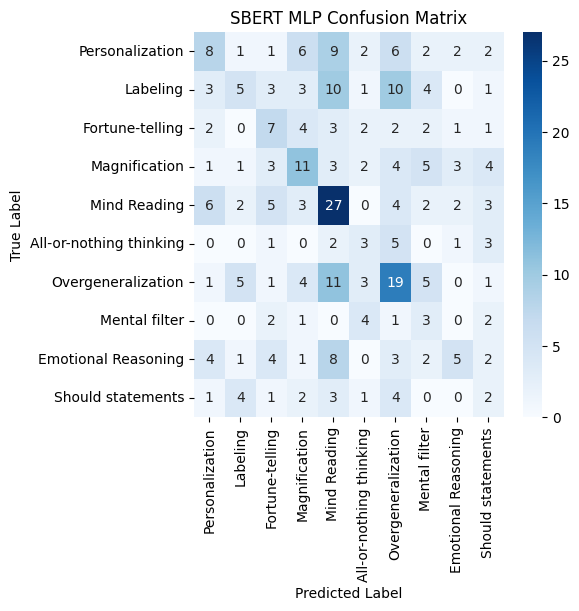

In [13]:
# vectorize the new training data
X_train_vectorized_new = vectorizer.encode(X_train_new.tolist())

# train the model on the new training data
model.fit(X_train_vectorized_new, y_train_new)

# predict the labels for the testing data
y_pred_new = model.predict(X_test_vectorized)

# calculate the F1-score
f1_new = f1_score(y_test, y_pred_new, average='weighted')

# output the F1-score
print(f"F1-score: {f1_new}")

# print the confusion matrix with the actual and predicted labels
print(confusion_matrix(y_test, y_pred_new))

# plot the confusion matrix as a heatmap
labels = distortion_data['Dominant Distortion'].unique()
cm = confusion_matrix(y_test, y_pred_new, labels=labels)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SBERT MLP Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, HalvingGridSearchCV

def tuneParams(model, params, X_train, y_train, X_test, y_test):
    # Create a HalvingGridSearchCV and a RandomizedSearchCV object with the model and vectorizer
    search = HalvingGridSearchCV(model, params, cv=5, n_jobs=-1, verbose=1)
    #search = RandomizedSearchCV(model, params, n_iter=100, cv=5, n_jobs=-1, verbose=1)

    # Train and test the model
    search.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = search.predict(X_test)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test)

    # Calculate the F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Output the F1-score
    print(f"{model.__class__.__name__} F1-score: {f1}")

    # Print the best parameters
    print(search.best_params_)
    return f1

In [15]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Create an array of models to test
models = [
    BernoulliNB(),
    LogisticRegression(),
    SGDClassifier(),
    SVC(),
    LinearSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    MLPClassifier()
]

# Create an array of model parameters to test
params = [
    {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    {'C': [2.6]},
    {'alpha': [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003]},
    {'C': [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]},
    {'C': [0.4, 0.5, 0.6]},
    {'max_depth': [1, 2, 3, 4, 5 ]},
    {'n_estimators': [70, 80, 90, 100, 110, 120, 130, 140]},
    {'n_estimators': [35, 40, 45, 50, 55, 60, 65, 70, 75]},
    {'n_neighbors': [10, 11, 12, 13, 14, 16, 18, 20]},
    {'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]}
]

# store the F1-scores
f1_scores = []

# test all models
for i in range(len(models)):
    f1 = tuneParams(models[i], params[i], X_train_vectorized_new, y_train_new, X_test_vectorized, y_test)
    f1_scores.append(f1)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 231
max_resources_: 2080
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 231
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 3
n_resources: 693
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 1
n_resources: 2079
Fitting 5 folds for each of 1 candidates, totalling 5 fits
BernoulliNB F1-score: 0.1616822296252317
{'alpha': 0.5}
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 2080
max_resources_: 2080
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 2080
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression F1-score: 0.2301963153626764
{'C': 2.6}
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 693
max_resources_: 2080
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 693
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 1
n_candidates: 2
n_resources: 2079
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGDClassifier F1-score: 0.1735004362960249
{'alpha': 0.001}
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 693
max_resources_: 2080
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 7
n_resources: 693
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 1
n_candidates: 3
n_resources: 2079
Fitting 5 folds for each of 3 candidates, totalling 15 fits
SVC F1-score: 0.21562912131894088
{'C': 2}
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 693
max_reso

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC F1-score: 0.2701967348962869
{'C': 0.5}
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 693
max_resources_: 2080
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 5
n_resources: 693
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 2
n_resources: 2079
Fitting 5 folds for each of 2 candidates, totalling 10 fits
DecisionTreeClassifier F1-score: 0.12068004513565814
{'max_depth': 3}
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 693
max_resources_: 2080
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 693
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 3
n_resources: 2079
Fitting 5 folds for each of 3 candidates, totalling 15 fits
RandomForestClassifier F1-score: 0.18198444602536515
{'n_estimators': 140}
n_iterations: 3
n_required_iterations: 3
n_possible_iteration

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier F1-score: 0.24705560838772658
{'alpha': 0.05}


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


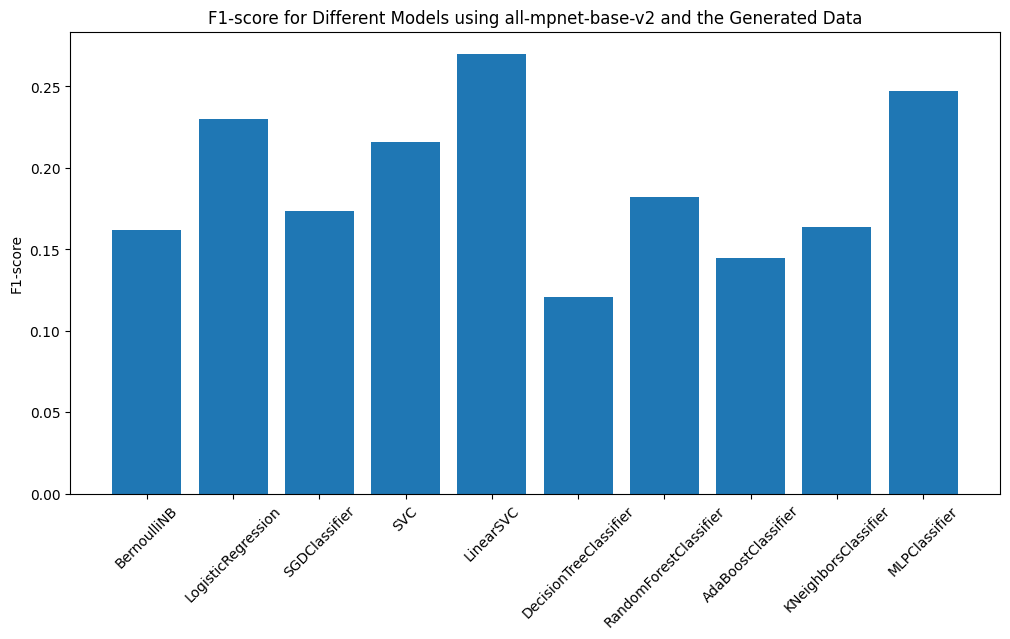

In [16]:
# graph the F1-scores
plt.figure(figsize=(12, 6))
plt.bar([model.__class__.__name__ for model in models], f1_scores)
plt.xticks(rotation=45)
plt.ylabel('F1-score')
plt.title('F1-score for Different Models using all-mpnet-base-v2 and the Generated Data')
plt.show()


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 693
max_resources_: 2080
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 693
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 2079
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC F1-score: 0.2740653855016806
[[ 9  1  1  5  9  2  7  2  2  1]
 [ 3  5  3  3 10  1 10  4  0  1]
 [ 2  0  8  4  3  2  2  1  1  1]
 [ 1  1  3 11  3  2  4  5  3  4]
 [ 6  2  4  5 25  0  4  2  3  3]
 [ 0  0  1  0  2  3  5  0  1  3]
 [ 1  5  2  4 11  2 19  4  1  1]
 [ 0  0  2  1  0  3  1  3  1  2]
 [ 5  1  4  2  7  0  2  2  5  2]
 [ 1  4  1  2  4  1  3  0  0  2]]


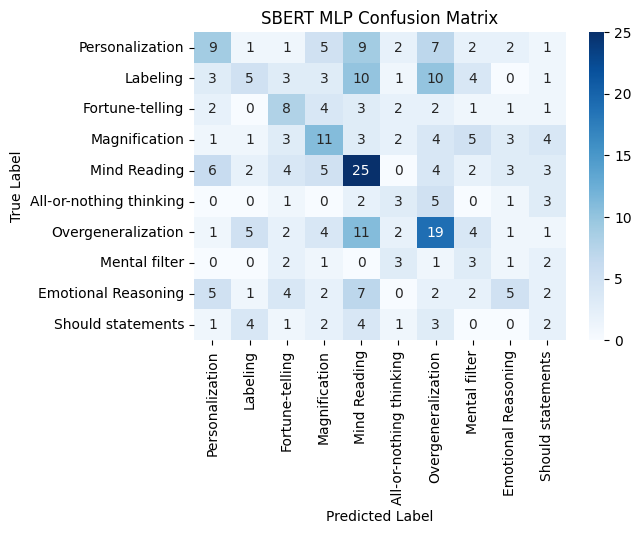

In [17]:
# run the best model with the best parameters
for i in range(len(models)):
    if f1_scores[i] == max(f1_scores):
        best_model = models[i]
        best_params = params[i]
        break

# train the best model with the best parameters manually
search = HalvingGridSearchCV(best_model, best_params, cv=5, n_jobs=-1, verbose=1)
search.fit(X_train_vectorized_new, y_train_new)
y_pred = search.predict(X_test_vectorized)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"{best_model.__class__.__name__} F1-score: {f1}")

# print the confusion matrix with the actual and predicted labels
print(confusion_matrix(y_test, y_pred, labels=distortion_data['Dominant Distortion'].unique()))

# plot the confusion matrix as a heatmap
labels = distortion_data['Dominant Distortion'].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SBERT MLP Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
# TODO: use openai's GPT-4 to generate more data
# TODO: use openai's text encoder to encode the data and compare the results with the other models

# use openai's text encoder to encode the data
from openai import OpenAI
from typing import Iterator, List
client = OpenAI()

def get_embedding(text, model="text-embedding-3-small"):
   return client.embeddings.create(input = text, model=model).data[0].embedding

# encode the testing data
X_test_encoded = get_embedding(X_test)

# encode the training data
X_train_encoded = get_embedding(X_train)

# train the model on the training data
model.fit(X_train_encoded, y_train)

# predict the labels for the testing data
y_pred_encoded = model.predict(X_test_encoded)

# calculate the F1-score
f1_encoded = f1_score(y_test, y_pred_encoded, average='weighted')

# output the F1-score
print(f"F1-score: {f1_encoded}")

# print the confusion matrix with the actual and predicted labels
print(confusion_matrix(y_test, y_pred_encoded))

# plot the confusion matrix as a heatmap
labels = distortion_data['Dominant Distortion'].unique()
cm = confusion_matrix(y_test, y_pred_encoded, labels=labels)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('OpenAI Text Encoder MLP Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

TypeError: Object of type Series is not JSON serializable